In [310]:
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
import numpy as np

from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.utils import resample
import sklearn.metrics

import joblib #Salva o modelo gerado
import shap #Visualizar a importância das features
shap.initjs()

In [311]:
dataset = pd.read_csv('modelo_treino_pass_2_teams.csv')
#dataset.drop(['prev_ball_zone','zone_get_possesion'],axis=1,inplace=True)
dataset_upsampled = dataset

In [312]:
#class_obj = dataset[dataset.danger_zone == 1]
#class_another = dataset[dataset.danger_zone == 0]

In [313]:
#Deixando os dados balanceados
#sampled = resample(class_obj, replace=True, n_samples=int((class_another.index.size)))
#dataset_upsampled = pd.concat([class_another,sampled])

In [314]:
Y = dataset_upsampled.danger_zone
X = dataset_upsampled = dataset_upsampled.drop(['danger_zone'], axis=1)

In [315]:
#X = dataset_upsampled.iloc[:,1:30]
#Y = dataset_upsampled.iloc[:,30]

#X = dataset_upsampled.iloc[:,1:34]
#Y = dataset_upsampled.iloc[:,34]


In [316]:
#Separação dos dados 'estratificando' entre Treinamento e teste 80% Treinamento e 20% Teste
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('danger_zone', axis=1),dataset['danger_zone'], stratify=dataset['danger_zone'], test_size=0.20)

#Separação dos dados de treinamento entre 20% Validação e 80% Treinamento
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.20)

In [317]:
#Separação dos dados entre treino e validação SEM estratificação

#seed = 8
#test_size = 0.33
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [318]:
#Dropando coluna sem nome criada na separação dos dados
X_train.drop(X_train.columns[[0,1]], 1, inplace=True )
X_test.drop(X_test.columns[[0,1]], 1, inplace=True )
X_val.drop(X_val.columns[[0,1]], 1, inplace=True )

In [319]:
model = XGBClassifier(booster='gbtree',objective='binary:logistic',eval_metric='logloss', scale_pos_weight=9.157, max_depth=6)
model.fit(X_train, y_train)

XGBClassifier(eval_metric='logloss', max_depth=6, scale_pos_weight=9.157)

In [320]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [321]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.93%


In [322]:
#Importância de cada feature para o modelo
#plot_importance(model,importance_type='gain')
#plot_importance(model,importance_type='cover')
#plot_importance(model,importance_type='weight')

In [323]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
#https://github.com/slundberg/shap

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [324]:
atributos_nomes = ['Quantidade de passes', 'Zona em que pegou a posse de bola', 'Centralidade Time A', 'Centralidade do Time B',
    'Entropia do Time A', 'Entropia do Time B', 'Jogadores de Ataque na_z1', 'Jogadores de Ataque na_z2', 'Jogadores de Ataque na_z3', 'Jogadores de Ataque na_z4',
    'Jogadores de Ataque na_z5', 'Jogadores de Ataque na_z6', 'Jogadores de Ataque na_z7', 'Jogadores de Ataque na_z8', 'Jogadores de Ataque na_z9', 'Jogadores de Ataque na_z10', 'Jogadores de Ataque na_z11',
    'Jogadores de Ataque na_z12', 'Jogadores de Defesa na_z1', 'Jogadores de Defesa na_z2', 'Jogadores de Defesa na_z3', 'Jogadores de Defesa na_z4', 'Jogadores de Defesa na_z5', 'Jogadores de Defesa na_z6',
    'Jogadores de Defesa na_z7', 'Jogadores de Defesa na_z8', 'Jogadores de Defesa na_z9', 'Jogadores de Defesa na_z10', 'Jogadores de Defesa na_z11', 'Jogadores de Defesa na_z12',
    'tA_ball_poss', 'tB_ball_poss', 'Velocidade do Ataque na Zona 1', 'Velocidade do Ataque na Zona 2', 'Velocidade do Ataque na Zona 3', 'Velocidade do Ataque na Zona 4', 'Velocidade do Ataque na Zona 5',
    'Velocidade do Ataque na Zona 6', 'Velocidade do Ataque na Zona 7', 'Velocidade do Ataque na Zona 8', 'Velocidade do Ataque na Zona 9', 'Velocidade do Ataque na Zona 10', 'Velocidade do Ataque na Zona 11', 'Velocidade do Ataque na Zona 12', 'Velocidade da Defesa na Zona 1', 'Velocidade da Defesa na Zona 2',
    'Velocidade da Defesa na Zona 3', 'Velocidade da Defesa na Zona 4', 'Velocidade da Defesa na Zona 5', 'Velocidade da Defesa na Zona 6', 'Velocidade da Defesa na Zona 7', 'Velocidade da Defesa na Zona 8', 'Velocidade da Defesa na Zona 9', 'Velocidade da Defesa na Zona 10', 'Velocidade da Defesa na Zona 11',
    'Velocidade da Defesa na Zona 12']

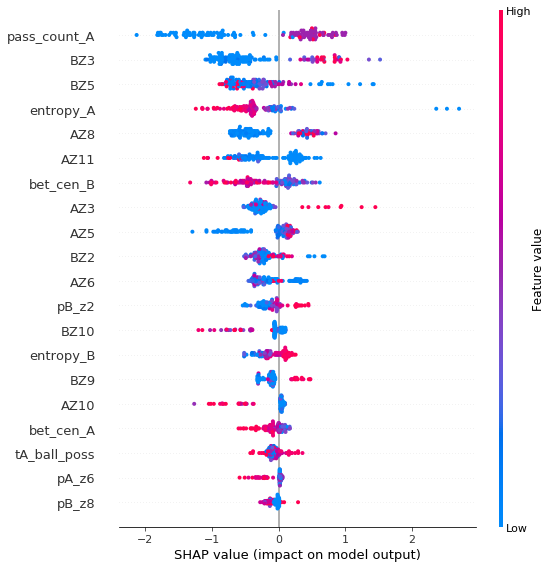

In [325]:
#Relação de cada feature com o valor da predição
shap.summary_plot(shap_values, X_train)#,feature_names = atributos_nomes)#, alpha=0.5)

In [326]:
a = X[X.pA_z2 > 1]
a.shape[0] / X.shape[0]

0.4146341463414634

In [327]:
#shap.force_plot(explainer.expected_value, shap_values, X_train)
#shap.summary_plot(shap_values, X_train, plot_type="bar")

In [328]:
#shap.dependence_plot("BZ2", shap_values, X_train, alpha=0.5)

In [329]:
#Plotando relação entre a quantidade de atacantes e o que influenciou
#shap.dependence_plot("rank(1)", shap_values, X_train, alpha=0.5, feature_names = atributos_nomes, title="Influência da linha defensiva no ataque")
#shap.dependence_plot("rank(2)", shap_values, X_train, alpha=0.5, feature_names = atributos_nomes, title="Influência da linha defensiva no ataque")
#shap.dependence_plot("rank(3)", shap_values, X_train, alpha=0.5, feature_names = atributos_nomes, title="Influência da linha defensiva no ataque")
#shap.dependence_plot("rank(6)", shap_values, X_train, alpha=0.5, feature_names = atributos_nomes, title="Influência da linha defensiva no ataque")

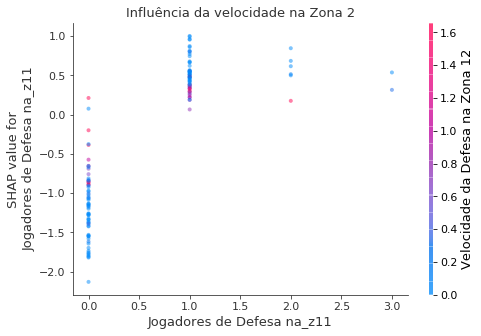

In [330]:
shap.dependence_plot("rank(0)", shap_values, X_train, alpha=0.5, feature_names = atributos_nomes, title="Influência da velocidade na Zona 2")

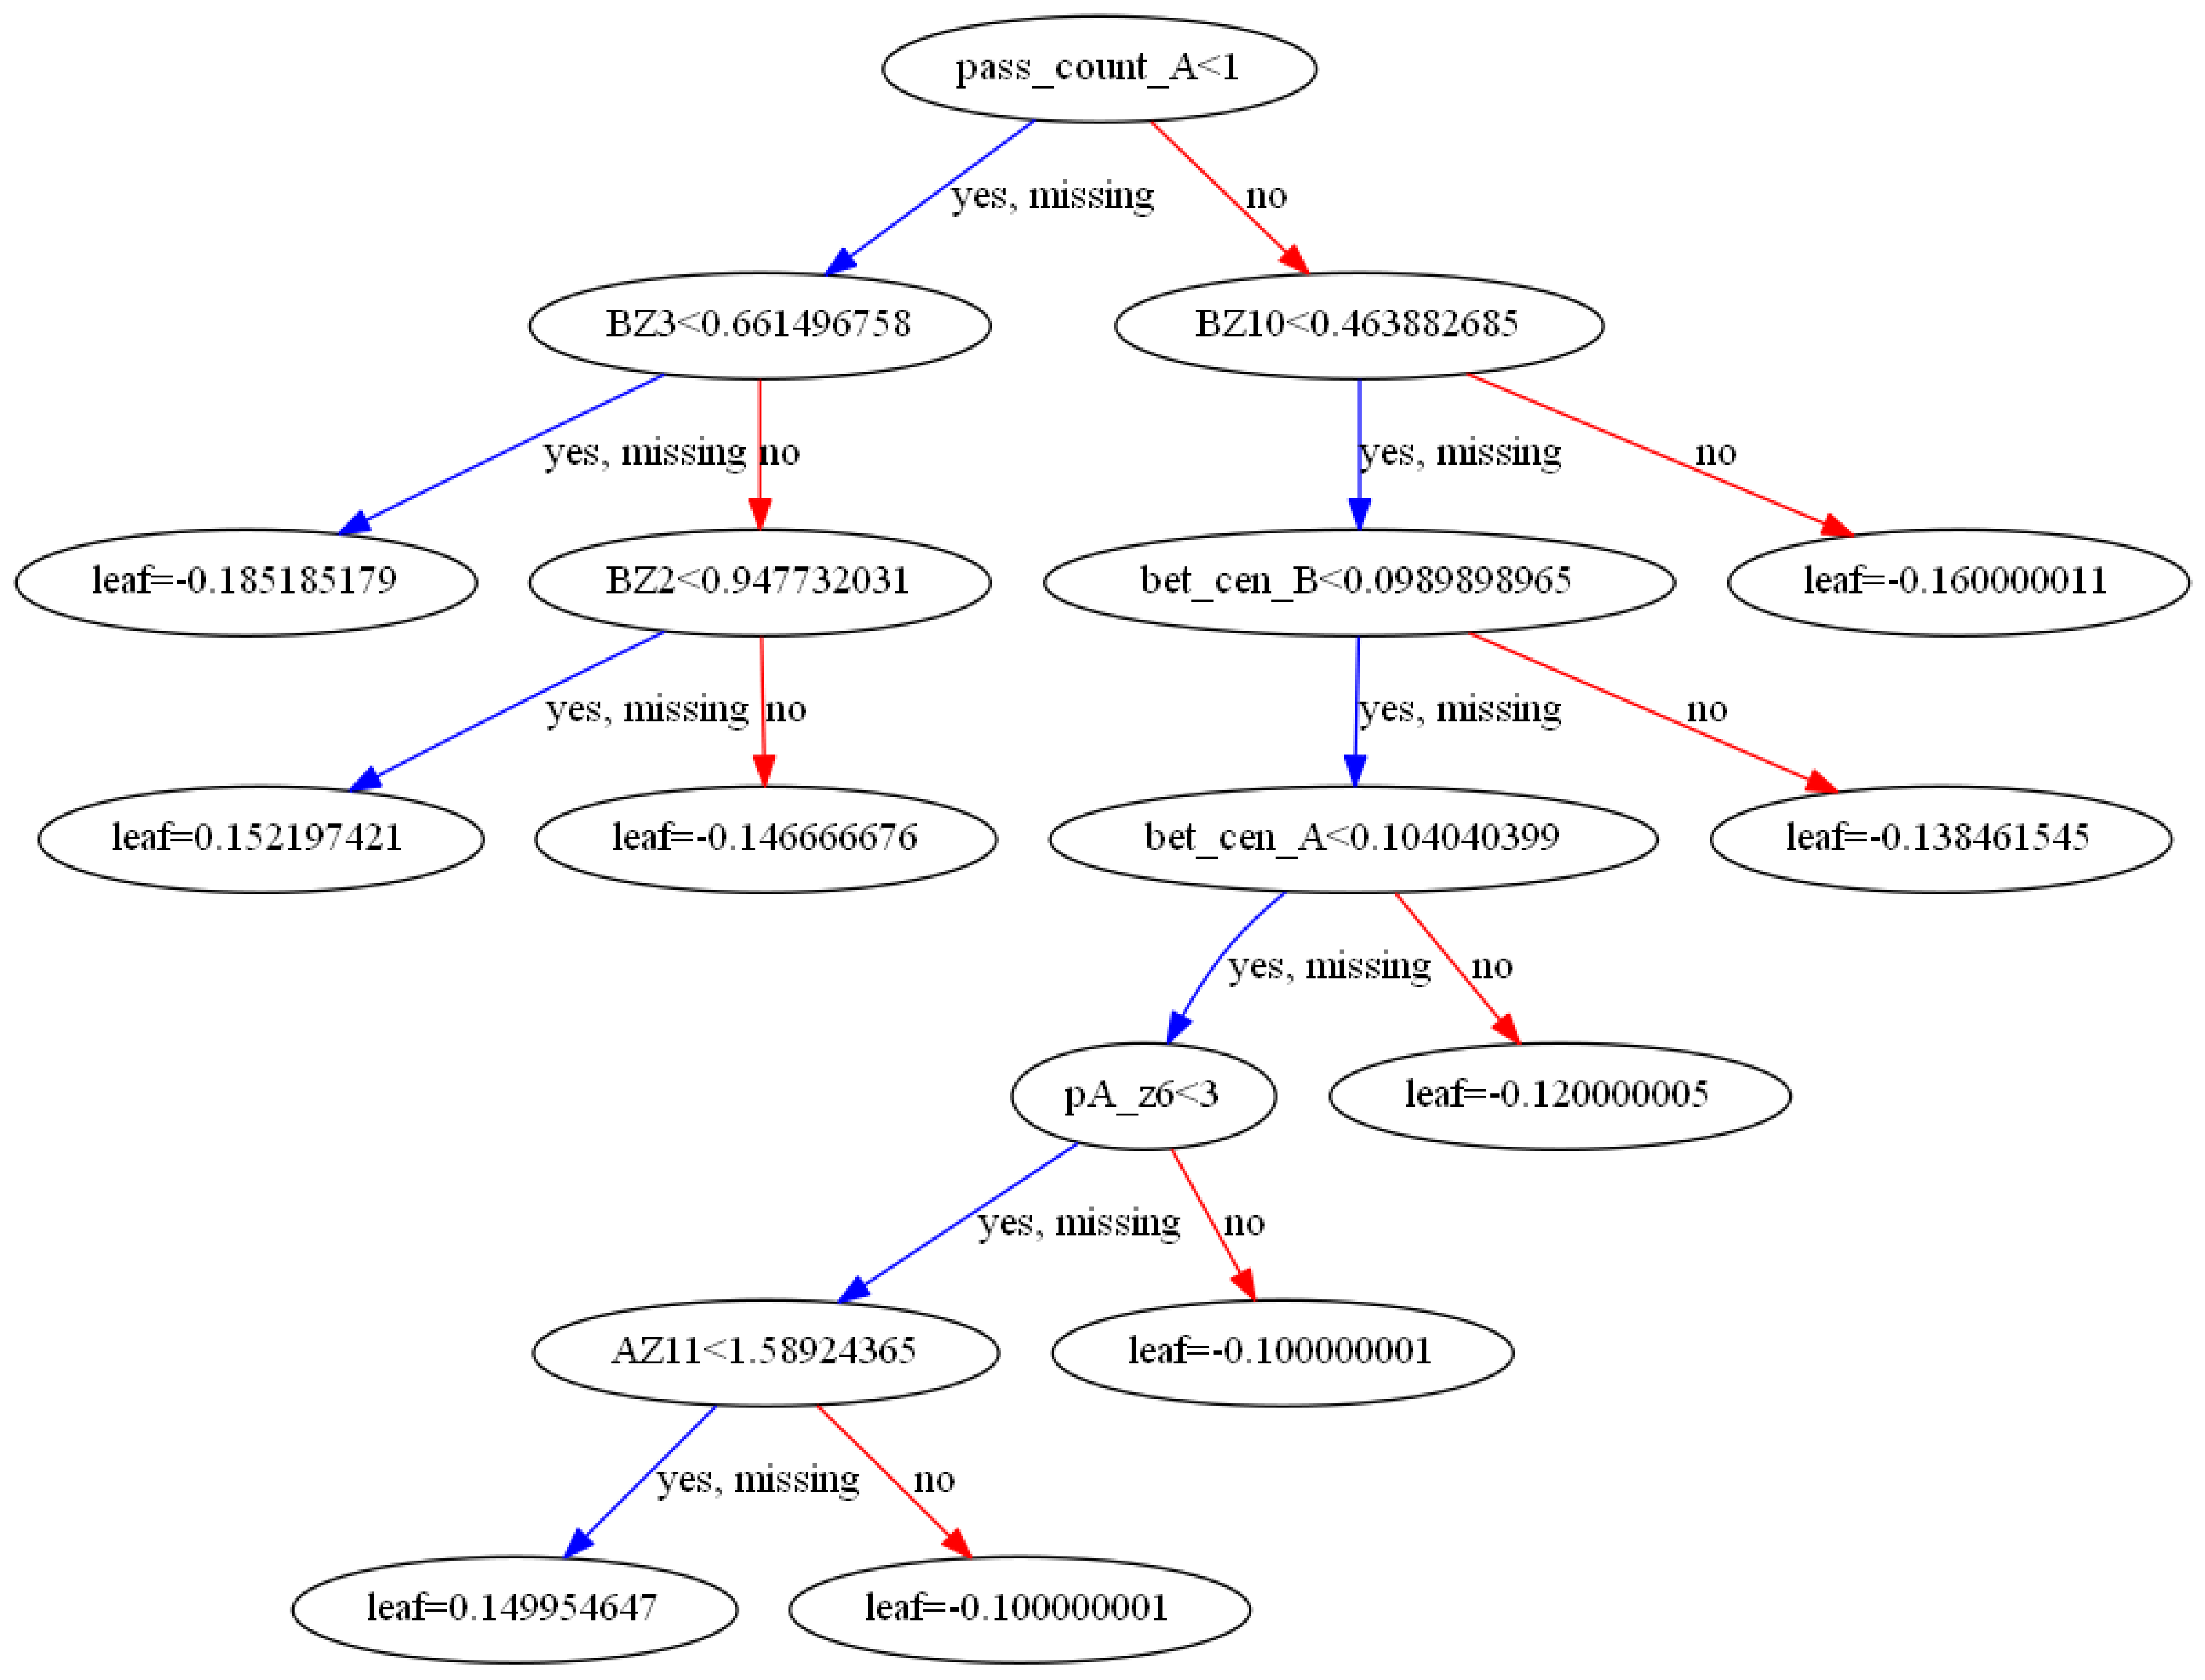

In [331]:
plot_tree(model, )
fig = plt.gcf()
fig.set_size_inches(100, 50)

In [332]:
#plot_tree(model, num_trees=4)
#fig = plt.gcf()
#fig.set_size_inches(40, 25)

In [333]:
#Calculando valores de uma folha em porcentagem
#1/(1+ np.exp(-(0.06)))

In [334]:
#Salvado modelo treinado
#joblib.dump(model,'zona_interesse_xgboost_v7')

In [335]:
#model2 = joblib.load('zona_interesse_xgboost_v7')

In [336]:
precision, recall, thresholds = precision_recall_curve(y_test, predictions)

In [337]:
#Calculo dos valores da matriz de confusão (Precision, Recall e fbeta_score )
precision_recall_fscore_support(y_test,predictions)

(array([0.87179487, 0.        ]),
 array([0.94444444, 0.        ]),
 array([0.90666667, 0.        ]),
 array([36,  5], dtype=int64))

In [338]:
#print(precision)
#print(recall)
#print(thresholds)

In [339]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.93%


# Jogo avulso

In [ ]:
#dataset_avulso = pd.read_csv('modelo_treino_11_REDMACT2.csv')
#dataset_upsampled = dataset

In [ ]:
Y2 = dataset_avulso.danger_zone
X2 = dataset_avulso = dataset_avulso.drop(['danger_zone'], axis=1)

In [ ]:
X2.drop(X2.columns[0], 1, inplace=True )
X2.drop(['prev_ball_zone'],axis=1,inplace=True)

In [ ]:
y2_pred = model2.predict(X2)
predictions2 = [round(value) for value in y2_pred]

In [ ]:
accuracy2 = accuracy_score(Y2, predictions2)
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))

In [ ]:
explainer = shap.TreeExplainer(model2)
shap_values2 = explainer.shap_values(X2)
#https://github.com/slundberg/shap

In [ ]:
shap.summary_plot(shap_values2, X2,feature_names=atributos_nomes)